<a href="https://colab.research.google.com/github/Jung0Jin/GenerativeDeepLearning/blob/main/%EB%AF%B8%EC%88%A0%EA%B4%80%EC%97%90GAN%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%A4%EC%A0%84%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2.3.1 데이터 적재

In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

# x_train에 [50000, 32, 32, 3] 크기의 numpy 배열 적재
# x_test에 [10000, 32, 32, 3] 크기의 numpy 배열 적재
# y_train에 [50000, 1] 크기의 numpy 배열 적재
# y_test에 [10000, 1] 크기의 numpy 배열 적재
# y_train, y_test는 각 이미지의 클래스에 해당하는 0~9 사이 정수 레이블을 갖는다.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


NUM_CLASSES = 10

# 이미지는 0~255 사이 정수로 구성된다. 신경망은 -1~1 사이를 입력받아야 가장 잘 동작한다. 따라서 255로 나눈다.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 이미지의 정수 레이블을 원-핫 인코딩 벡터로 바꾼다.
# 따라서 변환된 y_train은 [50000, 10], y_test는 [10000, 10] 크기의 배열이다.
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

170500096/170498071 [==============================] - 2s 0us/step


x_train의 크기가 [50000, 32, 32, 3]이라는 것은 데이터셋에 있는 이미지의 인덱스가 50000, 이미지의 높이가 32, 이미지의 너비가 32, 컬러 채널이 RGB로 3이라는 의미다.

예를 들어 x_train[54, 12, 13, 1]은 인덱스 54의 이미지에서 (12, 13) 위치에 해당하는 픽셀의 초록 채널(1)을 의미한다.

### 2.3.2 모델 만들기

In [2]:
# 예제 2-1 Sequential 모델을 사용한 네트워크
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
                    Dense(200, activation = 'relu', input_shape=(32, 32, 3)),
                    Flatten(),
                    Dense(150, activation = 'relu'),
                    Dense(10, activation = 'softmax'),
])

In [3]:
# 예제 2-2 함수형 API를 사용한 네트워크
from keras.layers import Input, Flatten, Dense
from keras.models import Model

input_layer = Input(shape=(32, 32, 3))

x = Flatten()(input_layer)

x = Dense(units=200, activation= 'relu')(x)
x = Dense(units=150, activation= 'relu')(x)

output_layer = Dense(units=10, activation= 'softmax')(x)

model = Model(input_layer, output_layer)

Input 층: 네트워크의 시작점, 네트워크가 기대하는 입력 데이터 크기를 튜플로 알려준다. Input 층에 임의의 이미지 개수를 전달할 수 있기 때문에 배치 크기는 필요하지 않다.

Flatten 층: 입력을 하나의 벡터로 펼친다. Flatten 클래스의 객체를 만든 다음 이 객체를 매개변수 input_layer로 호출했다. 파이썬의 객체는 함수처럼 호출할 수 있다. 이때 이 객체에 정의된 __call__() 메서드가 호출된다. 케라스에서는 이런 식의 객체 호출을 즐겨 사용한다. 결과 벡터의 길이는 3,072(32 X 32 X 3)이다. 뒤따르는 Dense 층이 다차원 배열이 아니라 평평한 입력을 기대하기 때문이다. 

Dense 층: 이전 층과 완전하게 연결(fully connected)되는 유닛을 가지고 있다. 이 층의 각 유닛은 이전 층의 모든 유닛과 연결되어 있다. 연결마다 하나의 (양수 또는 음수인) 가중치가 동반된다. 유닛의 출력은 이전 층으로부터 받은 입력과 가중치를 곱하여 더한 것이다. 입력과 가중치를 곱한 다음 상수 항에 해당하는 절편(intercept)을 더한 것이 유닛의 출력이다.

그다음 비선형 활성화 함수를 통과하여 다음 층으로 전달한다. 활성화 함수가 있어 입력을 비선형적으로 나타낼 수 있는 것이다.



In [4]:
'''
아래 두 표현은 동일하다.

x = Dense(units=200)(x)
x = Activation('relu')(x)

x = Dense(units=200, activation= 'relu')(x)
'''


"\n아래 두 표현은 동일하다.\n\nx = Dense(units=200)(x)\nx = Activation('relu')(x)\n\nx = Dense(units=200, activation= 'relu')(x)\n"

Input 층의 크기는 x_train의 크기와 맞아야 한다. 마지막 Dense 층의 출력 크기는 y_train 크기와 맞아야 한다.

In [5]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


모델이 너무 느리게 훈련된다면 summary 메서드를 확인해서 너무 많은 가중치가 있는 층을 확인하자. 가중치가 많은 층의 유닛의 개수를 줄여서 훈련 속도를 높일 수 있을지 검토해야 한다.

### 2.3.3 모델 컴파일

In [6]:
from keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

신경망이 회귀문제(regression), 즉 연속적인 값을 예측할 땐 평균 제곱 오차(Mean Squared Error, MSE)를 사용하자.

여러 클래스 중 하나에 속해야 하는 분류 문제라면 범주형 크로스 엔트로피(categorical cross-entropy)를 사용하자.

하나의 출력 유닛을 가진 이진 분류 문제이거나, 샘플이 여러 개의 클래스에 속할 수 있는 다중 레이블 분류 문제라면 이진 크로스 엔트로피(binary cross-entropy)를 사용하자.

옵티마이저는 손실 함수의 그래디언트를 기반으로 신경망의 가중치를 업데이트하기 위해 사용하는 알고리즘이다. 가장 널리 사용하고 안정적인 옵티마이저 중 하나는 Adam이다.

모델의 compile 메서드에 손실 함수와 옵티마이저를 전달한다. metrics 매개변수에는 정확도 같이 훈련 과정에서 기록하고 싶은 지표를 추가로 지정할 수 있다.

### 2.3.4 모델 훈련

In [7]:
model.fit(x_train,
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8389 - accuracy: 0.3379
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6542 - accuracy: 0.4105
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5773 - accuracy: 0.4378
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5247 - accuracy: 0.4554
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4826 - accuracy: 0.4718
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4515 - accuracy: 0.4824
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4216 - accuracy: 0.4941
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3957 - accuracy: 0.5026
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3721 - accuracy: 0.5128
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - l

### 2.3.5 모델 평가

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4197 - accuracy: 0.4964


[1.4197180271148682, 0.49639999866485596]

In [9]:
CLASSES = np.array(['airplane',
                    'automobile',
                    'bird',
                    'cat', 
                    'deer',
                    'dog',
                    'frog',
                    'horse',
                    'ship',
                    'truck'])

# 샘플마다 10개의 클래스 확률을 담은 벡터로 반환하자. [10000, 10]크기의 배열이다.
preds = model.predict(x_test)
# 이 확률 배열을 argmax 함수를 사용해 하나의 예측 결과로 바꾸자. 여기서 aixs=-1은 마지막 차원(클래스 차원)으로 배열을 압축하라는 뜻이다. [10000, 1]이 된다.
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

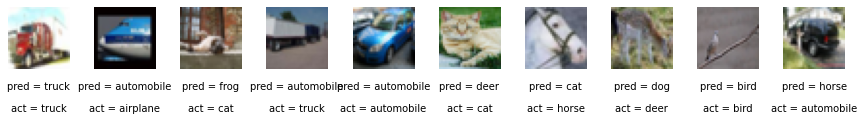

In [10]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10,
          ha='center', transform = ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10,
          ha='center', transform = ax.transAxes)
  ax.imshow(img)

## 2.4 모델 성능 향상

### 2.4.1 합성곱 층

In [11]:
from tensorflow.keras.layers import Conv2D

input_layer = Input(shape=(64, 64, 1))

conv_layer_1 = Conv2D(
    filters = 2,
    kernel_size = (3,3),
    strides = 1,
    padding = 'same'
)(input_layer)

In [12]:
input_layer = Input(shape=(32, 32, 3))

conv_layer_1 = Conv2D(
    filters = 10,
    kernel_size = (4,4),
    strides = 2,
    padding = 'same' 
)(input_layer)

conv_layer_2 = Conv2D(
    filters = 20,
    kernel_size = (3,3),
    strides = 2,
    padding = 'same'
)(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation='softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [13]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


### 2.4.2 배치 정규화 층

네트워크의 가중치를 일정한 범위 안에서 유지해야 한다.

값이 커지기 시작하면 네트워크에 그래디언트 폭주(gradient exploding) 문제가 발생했다는 신호다.

손실 함수가 NaN을 반환하기 시작하면 가중치가 오버플로(overflow) 에러를 발생시킬 만큼 커졌다는 신호다.

입력 데이터를 스케일 조정하는 이유 중 하나는 안정적으로 시작하기 위해서이다.

스케일이 조정되지 않은 입력은 큰 활성화 출력을 만들어 그래디언트 폭주로 이어질 가능성이 있다.

그래서 입력 층으로 0에서 255 사이의 픽셀값 대신 -1에서 1 사이의 값으로 스케일을 바꾼다.

입력 스케일을 조정했기 때문에 비교적 안정되리라 기대할 수 있다. 초기에는 맞는 말이나, 훈련됨에 따라 가중치 값이 초깃값과 멀어지기 때문에 이런 가정이 무너지기 시작한다. 이런 현상을 공변량 변화(covariate shift)라고 한다.

안정을 유지하려면 네트워크가 가중치를 업데이트할 때 각 층은 암묵적으로 이전 층에서 온 입력의 분포가 훈련 반복에 상관없이 일정하다고 가정한다. 하지만 활성화 출력의 분포가 어떤 반향으로 심하게 이동할 수 있다. 이를 막는 장치가 없다면 이따금 가중치 값이 매우 커지고 네트워크가 전체적으로 망가지게 된다. 이 문제를 극적으로 감소시키는 솔루션이 배치 정규화(batch normalization)이다.

배치 정규화 층은 배치에 대해 각 입력 채널별로 평균과 표준 편차를 계산한 다음 평균을 빼고 표준 편차로 나누어 정규화한다.

배치 정규화 층을 완전 연결 층이나 합성곱 층 직후에 두어 층의 출력을 정규화한다. 이는 책 사이에 스프링을 연결해 시간이 지나도 위치가 크게 변하지 않도록 도와주는 것과 비슷하다.

테스트할 떄는 이 층이 어떻게 동작할까? 예측을 수행할 때는 하나의 샘플에 대해 예측을 만들기 때문에 평균을 계산할 배치가 없다. 이 문제를 처리하기 위해 훈련 과정에서 배치 정규화 층이 채널별로 평균과 표준 편차의 이동 평균(moving average)을 계산하여 저장한다. 테스트할 떄 이 값을 사용하여 입력을 정규화한다.

배치 정규화 층에는 몇 개의 파라미터가 필요할까? 이전 층의 채널마다 스케일(gamma)과 이동(beta)을 위한 2개의가중치가 학습되어야 한다. 이 둘은 학습되는 파라미터다. 평균과 표준 편차의 이동 평균은 채널마다 계산되지만, 역전파를 통해 훈련되는 것이 아니라 층을 통과하는 데이터로부터 계산된다. 따라서 평균과 표준 편차의 이동 평균, 둘은 훈련되는 파라미터가 아니다. 종합해보면 채널마다 4개의 파라미터가 있고 2개는 훈련되고 2개는 훈련되지 않는다. 여기서 훈련되지 않는다는 것은 역전파를 사용하지 않는다는 뜻이다. (배치 정규화 층에서 훈련하는 동안 값을 바꾸기 때문에 4개를 모두 훈련되는 파라미터로 부르는 경우도 많다.)

In [15]:
# 케라스에서는 BatchNormalization 층이 배치 정규화를 구현한다.
from keras.layers import BatchNormalization

# momentum 매개변수는 평균과 표준 편차의 이동 평균을 계산할 때 이전 값에 주는 가중치이다.
BatchNormalization(momentum = 0.9)

### 2.4.3 드롭아웃 층

과대적합(overfitting) 문제에 대응하기 위해 규제(regularization) 기법을 사용한다.

머신러닝 알고리즘에 규제를 가하는 여러 가지 방법이 있지만 딥러닝에서 가장 널리 사용하는 것은 드롭아웃(dropout) 층이다.

In [17]:
# 케라스에서는 Dropout 층에 드롭아웃이 구현되어 있다. rate 매개변수는 이전 층에서 드롭아웃 할 유닛의 비율을 지정한다.
from keras.layers import Dropout

Dropout(rate = 0.25)

Dropout 층은 가중치 개수가 많아 과대적합되기 가장 쉬운 Dense 층 다음에 주로 사용된다. 하지만 합성곱 층 다음에 사용할 수도 있다.

배치 정규화도 과대적합을 감소시킨다고 알려져 최신 딥러닝 구조에서는 드롭아웃을 전혀 사용하지 않는다. 규제를 위해 배치 정규화만 사용한다. 많은 다른 딥러닝의 원리처럼 항상 통용되는 황금률은 없다. 무엇이 최선인지 확인하는 방법은 여러 가지 구조를 테스트해보고 어떤 것이 검증 세트에서 가장 뛰어난 성능을 내는지 확인하는 것이다!

### 2.4.4 합성곱, 배치 정규화, 드롭아웃 적용하기

In [25]:
from keras.layers import LeakyReLU
from keras.layers import Activation

input_layer = Input((32, 32, 3))

x = Conv2D(filters=32,
           kernel_size = 3,
           strides=1,
           padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32,
           kernel_size = 3,
           strides=2,
           padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64,
           kernel_size = 3,
           strides=1,
           padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64,
           kernel_size = 3,
           strides=2,
           padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)
model = Model(input_layer, output_layer)

In [26]:
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 16, 16, 32)       

각 층의 파라미터 개수를 계산해보자.

첫번째 합성곱 층: (3 X 3 X 3 + 1) X 32, 필터가 3 X 3이고, 이전 층의 채널이 3, 절편 1, 필터 수가 32

첫번째 합성곱 층의 배치 정규화: 필터 32개에 4개씩 파라미터가 붙으니 32 X 4

두번째 합성곱 층: (3 X 3 X 32 + 1) X 32, 필터가 3 X 3이고, 이전 층의 채널이 32, 절편 1, 필터 수가 32

두번째 합성곱 층의 배치 정규화: 필터 32개에 4개씩 파라미터가 붙으니 32 X 4

세번째 합성곱 층: (3 X 3 X 32 + 1) X 64, 필터가 3 X 3이고, 이전 층의 채널이 32, 절편 1, 필터 수가 64

세번째 합성곱 층의 배치 정규화: 필터 64개에 4개씩 파라미터가 붙으니 64 X 4

네번째 합성곱 층: (3 X 3 X 64 + 1) X 64, 필터 3 X 3이고, 이전 층의 채널이 64, 절편 1, 필터 수가 64

네번째 합성곱 층의 배치 정규화: 필터 64개에 4개씩 파라미터가 붙으니 64 X 4

첫번째 Dense 층: 마지막 합성곱 층을 통과한 데이터가 (8, 8, 64) 형식이므로, flatten에 의해 8 X 8 X 64 가 되고 절편 1이 붙어 4097개의 노드와 Dense 층의 128개의 노드가 만나 4097 X 128 

Dense 층의 배치 정규화: 128개의 노드에 4개씩 파라미터가 붙으니 128 X 4

두번째 Dense 층: ( 128 + 1 ) X 10

In [41]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train,
          y_train,
          batch_size = 1000,
          epochs = 10,
          shuffle = True)

Epoch 1/10
50/50 [==============================] - 147s 3s/step - loss: 1.8952 - accuracy: 0.3672
Epoch 2/10
50/50 [==============================] - 147s 3s/step - loss: 1.4396 - accuracy: 0.4900
Epoch 3/10
50/50 [==============================] - 139s 3s/step - loss: 1.2740 - accuracy: 0.5481
Epoch 4/10
50/50 [==============================] - 136s 3s/step - loss: 1.1559 - accuracy: 0.5911
Epoch 5/10
50/50 [==============================] - 138s 3s/step - loss: 1.0595 - accuracy: 0.6271
Epoch 6/10
50/50 [==============================] - 137s 3s/step - loss: 0.9943 - accuracy: 0.6495
Epoch 7/10
50/50 [==============================] - 137s 3s/step - loss: 0.9362 - accuracy: 0.6710
Epoch 8/10
50/50 [==============================] - 133s 3s/step - loss: 0.8864 - accuracy: 0.6897
Epoch 9/10
50/50 [==============================] - 135s 3s/step - loss: 0.8410 - accuracy: 0.7067
Epoch 10/10
50/50 [==============================] - 132s 3s/step - loss: 0.8033 - accuracy: 0.7202


In [42]:
# CNN 성능

model.evaluate(x_test,
               y_test,
               batch_size=1000)

10/10 [==============================] - 6s 620ms/step - loss: 1.2799 - accuracy: 0.5569


[1.2798562049865723, 0.5569000244140625]

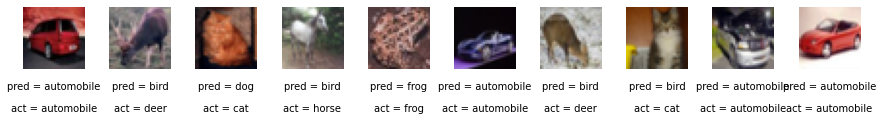

In [43]:
# CNN 예측

CLASSES = np.array(['airplane',
                    'automobile',
                    'bird',
                    'cat', 
                    'deer',
                    'dog',
                    'frog',
                    'horse',
                    'ship',
                    'truck'])

# 샘플마다 10개의 클래스 확률을 담은 벡터로 반환하자. [10000, 10]크기의 배열이다.
preds = model.predict(x_test)
# 이 확률 배열을 argmax 함수를 사용해 하나의 예측 결과로 바꾸자. 여기서 aixs=-1은 마지막 차원(클래스 차원)으로 배열을 압축하라는 뜻이다. [10000, 1]이 된다.
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10,
          ha='center', transform = ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10,
          ha='center', transform = ax.transAxes)
  ax.imshow(img)

## 2.5 요약

심층 신경망은 완전히 자유롭게 설계할 수 있다!

모델 구조에는 고정된 규칙이 없다!

네트워크를 통과하여 데이터가 흐르면서 어떻게 층이 텐서 크기를 바꾸는지 확실히 이해하고 경험을 쌓으면서 알게 될 것이다!

합성곱은 네트워크가 아니라 심층 신경망 안에 있는 층이다!